# Python for Data Analysys Skillcraft1 Data Set
*Johny LIN et Jérémy GOLDSCHILD*
Projet final du cours de Python for Data Analysis

*Project ESILV Promo 2021 IoT*

![eSport-Starcraft-II](media/starcraftgif.gif)

## Overview

StarCraft II est un jeu vidéo de stratégie en temps réel de science-fiction développé et publié par Blizzard Entertainment le 10 novembre 2015.

Le jeu vidéo StarCraft II est un jeu multijoueur où plusieurs joueurs s'affrontent dans une arène pour collecter des ressources, capturer des points stratégiques et détruire les bases adverses.

StarCraft II est un succès, s'étant vendu à plus de six millions d'exemplaires dans le monde entier et s'étant imposé comme un titre majeur des jeux de stratégie en temps réel et des sports électroniques.

## Dataset information

### Dataset Information

#### Source
> **Le Dataset est disponible ici :** [SkillCraft1 Master Table Data Set](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset)
#### Creators

- Creators: Mark Blair, Joe Thompson, Andrew Henrey, Bill Chen
- Mark Blair: Department of Psychology; Simon Fraser University; Burnaby; 8888 University Drive; mblair '@' sfu.ca)
- Date: September, 20, 2013

#### Dataset information given

- We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action.
- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.
- List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)

#### Dataset features 

Voici les différents informations sur les features données par la source.

Feature | Description | Type
--- | --- | ---
GameID | Unique ID number for each game | integer
LeagueIndex | Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues Ordinal 1-8 | integer
Age | Age of each player | integer
HoursPerWeek | Reported hours spent playing per week  | integer
TotalHours |  Reported total hours spent playing  | integer
APM | Action per minute | float
SelectByHotkeys | Number of unit or building selections made using hotkeys per timestamp | float
AssignToHotkeys | Number of units or buildings assigned to hotkeys per timestamp | float
UniqueHotkeys | Number of unique hotkeys used per timestamp | int
MinimapAttacks | Number of attack actions on minimap per timestamp | float
MinimapRightClicks | number of right-clicks on minimap per timestamp | float
NumberOfPACs | Number of PACs per timestamp | float
GapBetweenPACs | Mean duration in milliseconds between PACs | float
ActionLatency | Mean latency from the onset of a PACs to their first action in milliseconds | float
ActionsInPAC | Mean number of actions within each PAC | float
TotalMapExplored | The number of 24x24 game coordinate grids viewed by the player per timestamp | int
WorkersMade | Number of SCVs, drones, and probes trained per timestamp | float
UniqueUnitsMade | Unique unites made per timestamp | int
ComplexUnitsMade | Number of ghosts, infestors, and high templars trained per timestamp | float
ComplexAbilitiesUsed | Abilities requiring specific targeting instructions used per timestamp | float

Plusieurs features font relations à des termes techniques propre au jeu vidéo de stratégies.
- **AMP(Action par minute)** : Action effecutée par le joueur par seconde
- **Timestamp(Horodatage)** : Fait référence au système interne de gestion du temps dans le jeu StarCraft II.  1 seconde = 88.5 timestamp
- **PAC(Perception Action Cycle)** : Fait référence au cycle perception-action. Un PAC consiste en un déplacement par le joueur de l'écran vers un autre endroid de la carte du jeu pendant un certain temps, le joueur effectue ainsi aux moins une action sur cette nouvel endroid puis est suivi par un déplacement d'un autre endroid. Le PAC permet d'évaluer l'efficacité du joueur par le nombre d'action effectué sur plusieurs sur la carte sur une durée limité.

### Objectif of the analysis

Avec ce dataset, les objectifs sont de :
    - Data Exploration : Voir l'état des données
    - Data Cleaning : Nettoyer et préparer les données 
    - Data Visualisation : Observer les liens entre les données
    - Data Modelisation : Avec du Machine Learning, chercher le meilleur algorithme prédicitf
    - API Django : Une interface pour obtenir les résultats du projet
        

Le jeu vidéo comporte un **système de classement** qui classe les joueurs en fonction de leurs performances et de leurs victoires dans les matchs de compétition.
Le système de classement est caractérisé par différentes ligues, de la ligue de bronze (le niveau le plus bas) à la ligue professionnelle (un niveau professionnel).

Icon | Name Rank | Level
--- | --- | ---
 ![GMaster](media/GrandmasterMedium.png)| Grandmaster | Professional
 ![Master](media/MasterMedium.png)| Master | Competitive
 ![Diamond](media/DiamondMedium.png)| Diamond | Good
 ![Platinium](media/PlatinumMedium.png)| Platinum | Medium+
 ![Gold](media/GoldMedium.png)| Gold | Medium
 ![Silver](media/SilverMedium.png)| Silver | Medium-
 ![Bronze](media/BronzeMedium.png)| Bronze | Low
 
 
Son mode multijoueur a été particulièrement populaire, notamment en Corée du Sud, où de nombreux joueurs ont atteint le statut de professionnels. Et ce projet peut être utilisé comme un outil pour évaluer la performance du joueur selon sa performance durant une partie.


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## Import the Dataset

> Nous importons le dataset téléchargé depuis la source [SkillCraft1 Master Table Data Set](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset)

In [2]:
skillcraft =  pd.read_csv("dataset/SkillCraft1_Dataset.csv", sep = ",")
skillcraft.head(15)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


> Nous vérifions si les données concordent avec les informations fournis par le dataset

## Data Exploration

In [3]:
print(f"The dimension of the Skillcraft dataset : {skillcraft.shape}")

The dimension of the Skillcraft dataset : (3395, 20)


> Le nombre d'instance donné par le [dataset information](http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset) est aussi de 3395. 

In [4]:
skillcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

## Data Cleaning

> On remarque que les features Age, HoursPerWeek et TotalHours ne sont pas dans le bon format. Ils sont actuellement sous le format object au lieu du format int64.

In [5]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(skillcraft[column])}\n")

Age unique value
 : ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39' '?']

HoursPerWeek unique value
 : ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '?' '80' '60']

TotalHours unique value
 : ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '?' '35' '1163' '333' '75' '7' '40' '325' '90' '175'
 '88' '850' '26' '1650' '465' '235

> On vérifie le contenu des données uniques de ces 3 colonnes. On remarque des données invalides **?** au sein des colonnes Age, HoursPerWeek et TotalHours.

In [6]:
def count_wrong_value(dataset):
    title = dataset.columns
    wrong_value = pd.DataFrame(columns=['feature','count_?'])
    for i in range(len(title)):
        count=0
        col=dataset.iloc[:, i]
        for j in range(len(col)):
            if col[j] == '?':
                count+=1
        wrong_value = wrong_value.append({'feature': title[i],'count_?': count},ignore_index=True)
    return wrong_value

> On définie une méthode pour compter le nombre de donnée avec la valeur erronée **?**

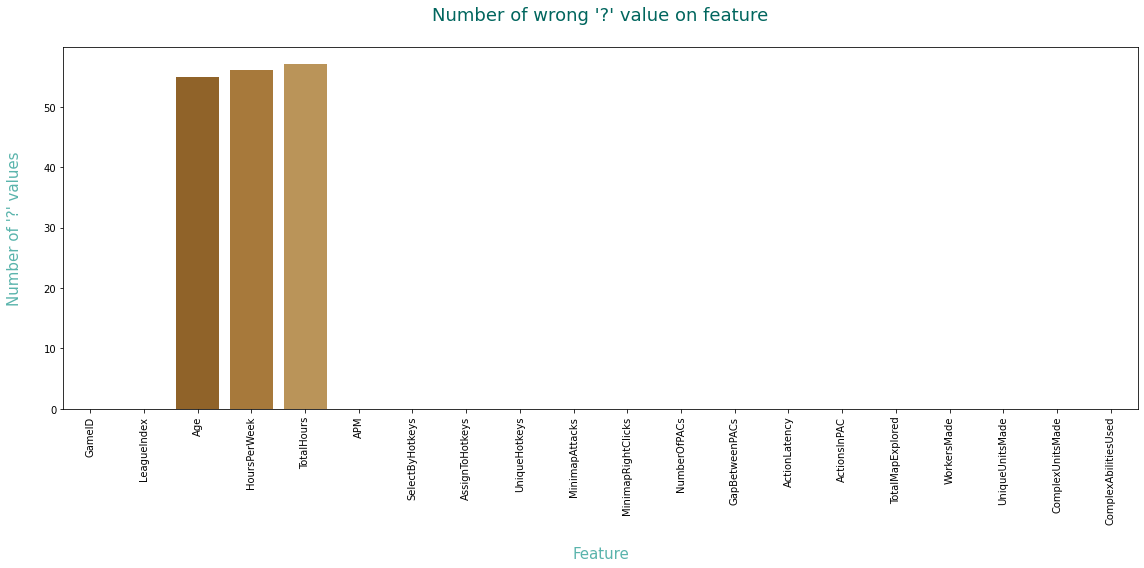

In [7]:
wrong_value = count_wrong_value(skillcraft)

plt.figure(figsize=(16,8))
sns.barplot(x=wrong_value.feature,y = wrong_value['count_?'],palette="BrBG")
plt.xlabel('\nFeature', fontsize=15, color='#5ab4ac')
plt.ylabel("Number of '?' values\n", fontsize=15, color='#5ab4ac')
plt.title("Number of wrong '?' value on feature\n", fontsize=18, color='#01665e')
plt.xticks(rotation= 90)
plt.tight_layout()

> On remarque une cinquantaine de valeurs erronées **?** dans les 3 colonnes. Nous avons decidé de supprimer les données de la ligne concernée.

In [8]:
sc_clean = skillcraft
ind = []
for i in range(len(sc_clean.TotalHours)):
    if sc_clean.TotalHours[i] == "?":
        ind.append(i)
        
sc_clean = sc_clean.drop(index=sc_clean.index[ind])
sc_clean = sc_clean.reset_index()
sc_clean

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,...,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,...,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,2,56,4,30,10,200,69.9612,0.001101,0.000336,4,...,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,57,3,19,20,400,107.6016,0.001034,0.000213,1,...,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,58,3,32,10,500,122.8908,0.001136,0.000327,2,...,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,...,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3334,3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,...,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3335,3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,...,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3336,3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,...,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


>  Les lignes avec les données avec des **?** ont été supprimé. On a effectue un reset des index. Maintenant, on allons manipuler le **DataFrame sc_clean**.

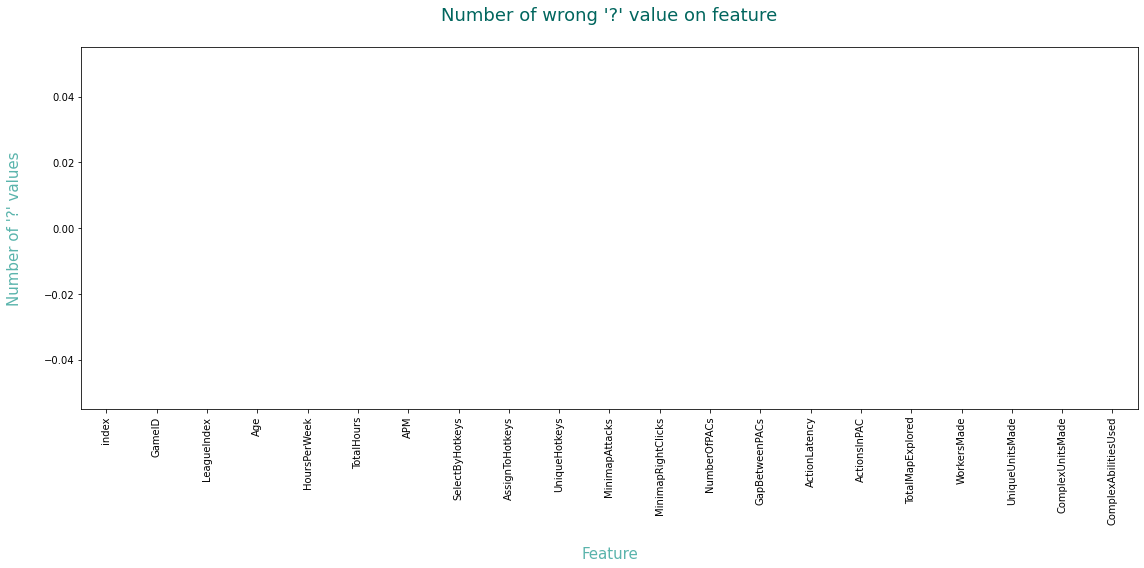

In [9]:
wrong_value_clean = count_wrong_value(sc_clean)

plt.figure(figsize=(16,8))
sns.barplot(x=wrong_value_clean.feature,y=wrong_value_clean['count_?'],palette="BrBG")
plt.xlabel('\nFeature', fontsize=15, color='#5ab4ac')
plt.ylabel("Number of '?' values\n", fontsize=15, color='#5ab4ac')
plt.title("Number of wrong '?' value on feature\n", fontsize=18, color='#01665e')
plt.xticks(rotation= 90)
plt.tight_layout()

In [10]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(sc_clean[column])}\n")

Age unique value
 : ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39']

HoursPerWeek unique value
 : ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '80' '60']

TotalHours unique value
 : ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '35' '1163' '333' '75' '7' '40' '325' '90' '175' '88'
 '850' '26' '1650' '465' '235' '1350' '46

> Le dataset est nettoyé des valeurs erronées.La base donnée semble avoir des données exploitables. Nous verifions les types des données.

In [11]:
sc_clean.dtypes

index                     int64
GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

> Nous allons convertir les types doonnées des colonnes Age HoursPerWeek et TotalHours de object à int.

In [12]:
for column in ['Age', 'HoursPerWeek', 'TotalHours']:
    sc_clean[column] = pd.to_numeric(sc_clean[column], errors = 'coerce').astype(int,errors ='ignore')
sc_clean.dtypes

index                     int64
GameID                    int64
LeagueIndex               int64
Age                       int32
HoursPerWeek              int32
TotalHours                int32
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

>  Les données des 3 colonnes sont convertis en in32. Une première convertion object à float64 puis float64 à int32. Nous avons utilisés le paramètre errors='coerce' pour forcer la conversion des valeurs invalides en NaN.

In [13]:
for column in ['Age','HoursPerWeek','TotalHours']:
    print(f"{column} unique value\n : {pd.unique(sc_clean[column])}\n")

Age unique value
 : [27 23 30 19 32 21 17 20 18 16 26 38 28 25 22 29 24 35 31 33 37 40 34 43
 41 36 44 39]

HoursPerWeek unique value
 : [ 10  20   6   8  42  14  24  16   4  12  30  28  70   2  56  36  40  18
  96  50 168  48  84   0  72 112  90  32  98 140  80  60]

TotalHours unique value
 : [   3000    5000     200     400     500      70     240   10000    2708
     800    6000     190     350    1000    1500    2000     120    1100
    2520     700     160     150     250     730     230     300     100
     270    1200      30     600     540     280    1600      50     140
     900     550     625    1300     450     750     612     180     770
     720     415    1800    2200     480     430     639     360    1250
     365     650     233     416    1825     780    1260     315      10
     312     110    1700      92    2500    1400     220     999     303
      96     184    4000     420      60    2400    2160      80      25
     624     176      35    1163     333      7

> On vérifie que la conversion n'a pas affectée les données des colonnes concernées. La conversion s'est bien passée. 

<AxesSubplot:title={'center':'Proportion of missing values on features'}, xlabel='feature'>

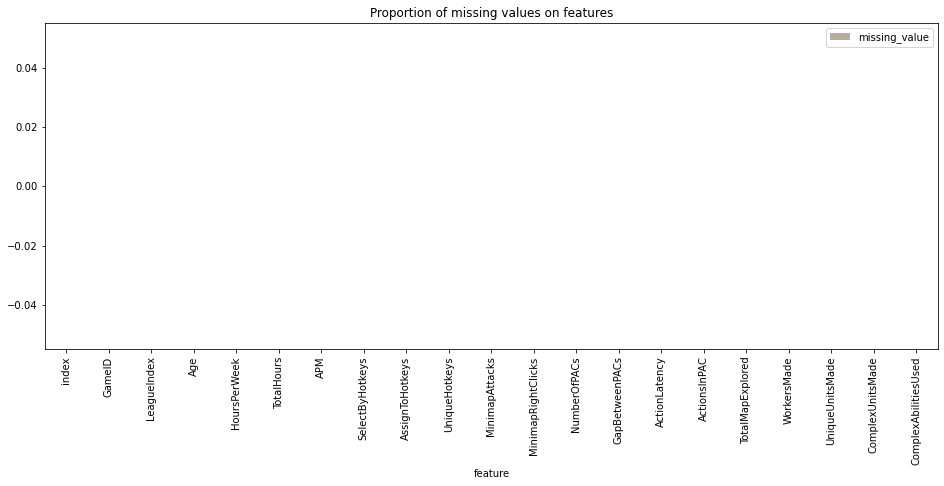

In [14]:
missing_value = pd.DataFrame(sc_clean.isnull().sum()).reset_index()
missing_value.columns = ['feature', 'missing_value']
missing_value.plot(x='feature', title='Proportion of missing values on features', kind='bar', cmap="BrBG", alpha=0.4,figsize=(16, 6))

> Avec la fonction DataFrame.isnull().sum(), on vérifie si aucune autre donnée du tableau possède des données nulls ou NaN.
> Les données sont maintenant nettoyées.

In [15]:
league_indexs = skillcraft["LeagueIndex"].unique()
league_indexs.sort()
league_name = ["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster","Profesional"]
league_indexs

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

> Pour faciliter la datavisualisation, nous allons rajouter une colonne des noms des ligues afin de faliciter la compréhension des données.

In [16]:
league_df = pd.DataFrame(league_name, columns= ['league'],dtype="string")
league_df['LeagueIndex'] = league_indexs
league_df

,league,LeagueIndex
0,Bronze,1
1,Silver,2
2,Gold,3
3,Platinum,4
4,Diamond,5
5,Master,6
6,GrandMaster,7
7,Profesional,8


In [17]:
sc_clean = sc_clean.merge(league_df,on ="LeagueIndex")
sc_clean.sort_values(by ="LeagueIndex")

,index,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,league
2556,765,2231,1,26,2,100,48.4494,0.000709,0.000228,3,...,0.002775,52.9913,84.6061,3.1991,26,0.000553,7,0.000000,0.000048,Bronze
2574,1166,3339,1,23,2,200,44.8266,0.000117,0.000093,3,...,0.002137,58.2418,94.7541,4.0437,21,0.000724,7,0.000000,0.000047,Bronze
2573,1152,3302,1,23,8,60,51.5208,0.000912,0.000155,5,...,0.002202,52.7874,101.3438,4.1016,21,0.000224,5,0.000000,0.000000,Bronze
2572,1148,3287,1,21,16,100,94.9017,0.003313,0.000097,2,...,0.002027,118.0000,110.0952,7.3810,12,0.000161,3,0.000000,0.000000,Bronze
2571,1139,3265,1,27,14,50,58.4136,0.001569,0.000349,4,...,0.001604,46.2418,106.5652,6.4783,14,0.001011,5,0.000000,0.000000,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1976,5604,7,16,28,500,201.4350,0.008216,0.000380,7,...,0.004234,32.7302,46.9022,6.8641,29,0.001875,8,0.000173,0.000288,GrandMaster
2701,1853,5289,7,16,28,2500,185.3424,0.010909,0.000918,5,...,0.004505,28.0093,44.2593,5.3333,31,0.000803,6,0.000386,0.000240,GrandMaster
2700,1787,5129,7,23,56,2500,213.6318,0.014339,0.000842,7,...,0.006499,30.5893,35.2771,4.1092,35,0.001311,11,0.000318,0.002217,GrandMaster
2698,1627,4699,7,23,14,750,166.5456,0.006804,0.000361,6,...,0.004065,18.4845,49.2562,6.1219,26,0.000664,7,0.000000,0.000000,GrandMaster


> La colonne a été rajoutée à la fin du DataFrame
> Les données sont nettoyées et préparer pour son exploitation. On peut passer à la DataVisualisation.

## Data Visualization

In [18]:
count_league = sc_clean.groupby(["LeagueIndex","league"], as_index=False)["GameID"].count()
count_league = pd.DataFrame(count_league)
count_league.rename(columns = {'GameID' : 'count'}, inplace=True)
count_league

,LeagueIndex,league,count
0,1,Bronze,167
1,2,Silver,347
2,3,Gold,553
3,4,Platinum,811
4,5,Diamond,804
5,6,Master,621
6,7,GrandMaster,35


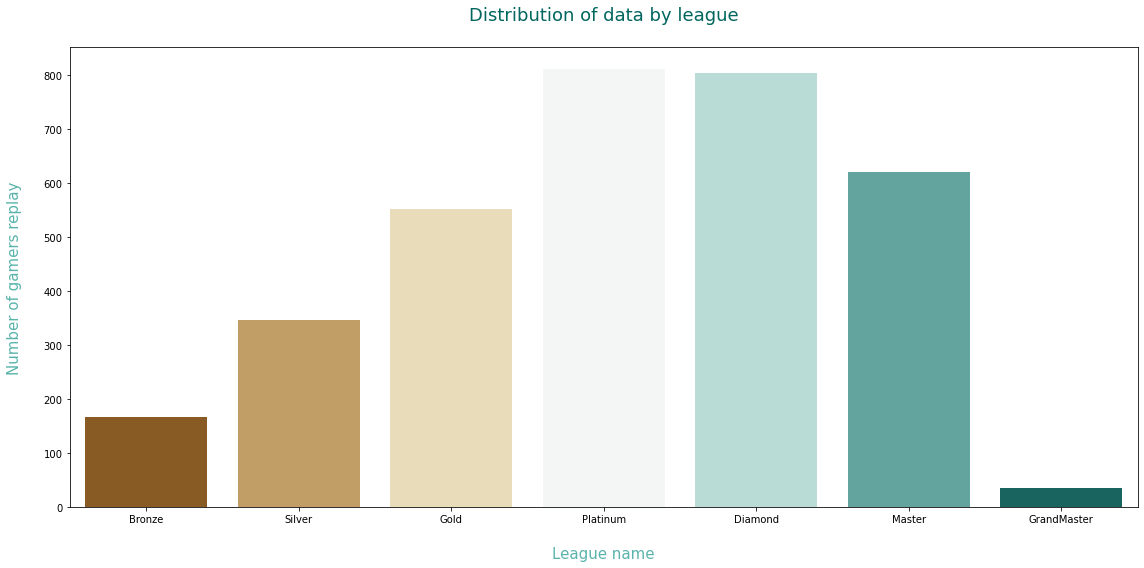

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(x=count_league["league"], y=count_league["count"], palette="BrBG")
plt.xlabel('\nLeague name', fontsize=15, color='#5ab4ac')
plt.ylabel("Number of gamers replay\n", fontsize=15, color='#5ab4ac')
plt.title("Distribution of data by league\n", fontsize=18, color='#01665e')
plt.tight_layout()


> On remarque plusieurs choses sur ce graphique :
> - Les données de la ligue profesionnelle ont été supprimé lors du DataCleaning. Ils comportaient donc des données ? sur leur Age et temps de jeu. Cela peut s'explique que ces comptes sont utilisés seulement dans le cadre compétitif et dans le cadre d'évenement e-sportif. Ces données ne sont pas exploitatble par leur statut.
> - De plus, les données des joueurs GrandMaster sont très faibles inférieur à 35. Après quelques recherches, la ligue GrandMaster correpond aux 200 meilleurs joueurs de la ligue Master. Cela explique sa faible présence dans les replays des joueurs.
> - La distribution semble suivre une loi normale. Le système de classement par ligue semble avoir une bonne distribution équilibré pour classer les différents joueurs du jeu.

C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


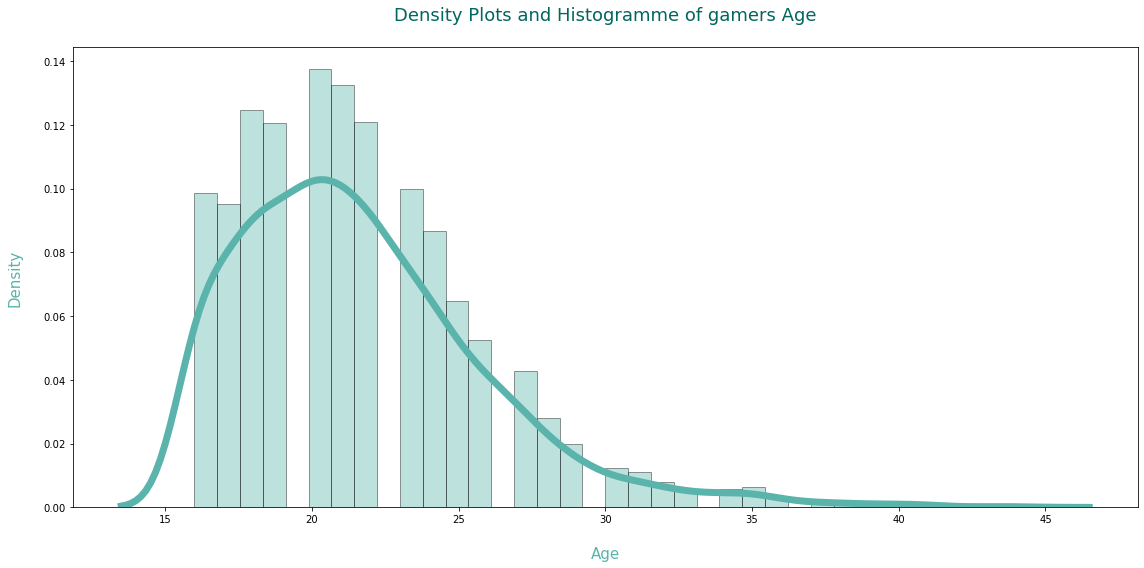

In [20]:
plt.figure(figsize=(16,8))
sns.distplot(sc_clean["Age"], hist=True, kde=True, 
             bins=int(180/5), color = '#5ab4ac', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 7})
plt.xlabel('\nAge', fontsize=15, color='#5ab4ac')
plt.ylabel("Density\n", fontsize=15, color='#5ab4ac')
plt.title("Density Plots and Histogramme of gamers Age\n", fontsize=18, color='#01665e')
plt.tight_layout()


> On s'intresse à la densité de l'âge des joueurs : 
> - Le jeu étant conseillé à l'âge de 16 ans (PEGI 16). L'âge des joueurs débute donc à 16 ans.
> - La densité semble suivre la forme d'une loi normale. La tranche d'âge du joueurs type de StarCraft II est de 16 à 23 ans. 

Text(0.5, 1.0, 'Correlation Matrix\n')

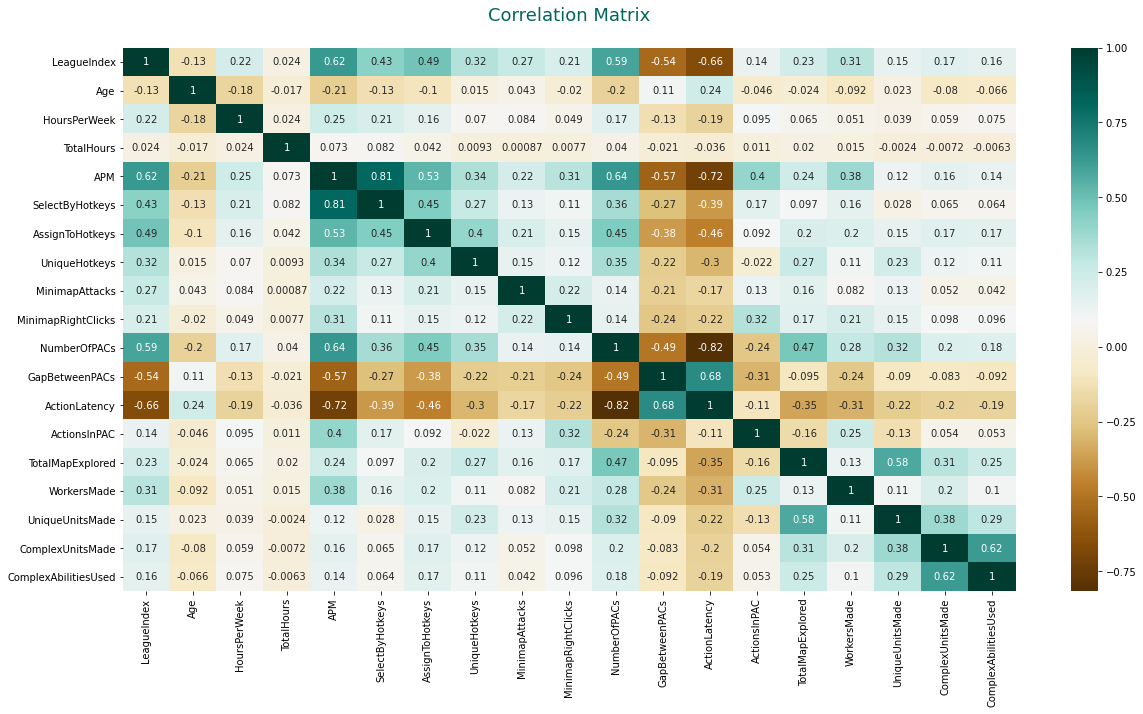

In [21]:
sc_clean_corr = sc_clean
sc_clean_corr = sc_clean_corr.drop(columns = ['index','GameID'])
plt.figure(figsize=(20,10))
coorMatrix = sc_clean_corr.corr()
sns.heatmap(coorMatrix,annot=True,cmap= "BrBG")
plt.title("Correlation Matrix\n", fontsize=18, color='#01665e')


> Nous construisons notre matrice de corrélation afin de voir les différents liens entre nos features : 
> - Nous avons pas pris en compte index et le GameID. Ce ne sont que des indexes ou identifiants.
> - On remarque 3 groupes de données :
>   - **Les données corrélées positivement avec LeagueIndex** : APM, SelectByHotKeys, AssignToHotkeys, NumberOfPACs
>   - **Les données corrélées négativement avec LeagueIndex** : GapBetweenPACs, ActionLatency
>   - **Les données peu corrélées**
>
> - On remarque des corrélations plus évident :
>   - Entre ComplexUnitsMade et ComplexAbilitiesUsed : L'utilisation d'abilité complexe est en lien avec le nombre d'unité complexe créé.
>   - **TotalMapExplored et UnitsMade** : Une grande quantité d'unité permet de exploration plus facilité de la carte.
>   - **ActionLatency et GapBetweenPACs** : Des actions lents entraînent des Cycle de perception-action plus lent et inversement.
>   - **APM et SelectHotKeys etc...**

### Visualisation on LeagueIndex

<Figure size 1440x1080 with 0 Axes>

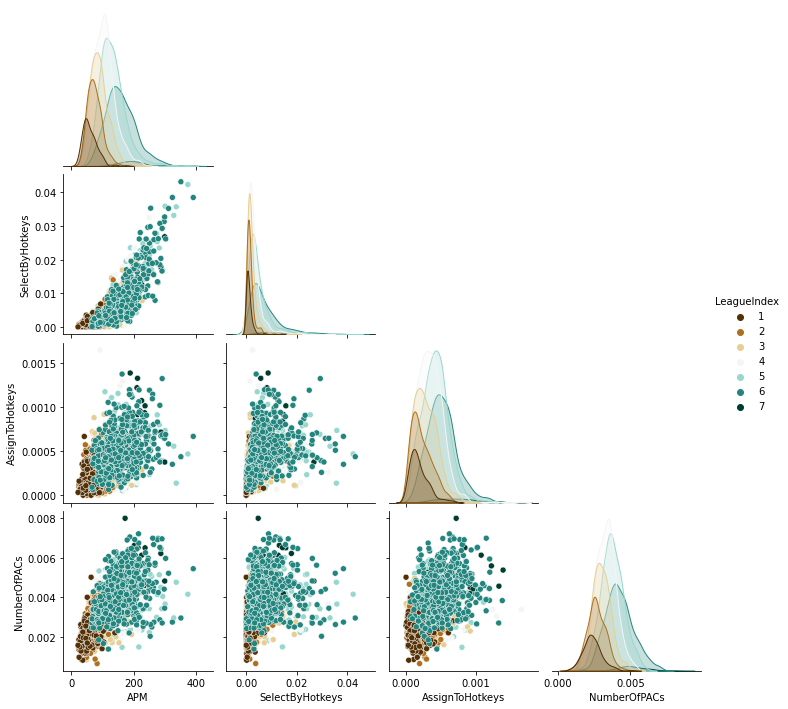

In [22]:
plt.figure(figsize=(20,15))
feature_positive_correlated = ['APM','SelectByHotkeys','AssignToHotkeys','NumberOfPACs']
sns.pairplot(sc_clean,hue = 'LeagueIndex',vars =feature_positive_correlated,palette="BrBG",corner=True)

> Nous construisons un pairplot pour visualiser dans un premier temps les **features fortement corrélées postivement** avec la ligue du joueur **LeagueIndex**.
>
> On distingue facilement la corrélation entre ces features et le classement du joueur dans une ligue : 
>
> - Un joueur de la ligue 1 ou 2 (de bas niveau Bronze ou Silver) aura un **NumberOfPACs faible (peu cycle d'action) donc moins d'action par un faible APM et des HotKeys (des raccourcis clavier moins solicités)**.
>
>-  On visualise donc le profil bon joueur par **un grand nombre d'action APM, des cycles Perpection Action bien plus nombreux et une sélection plus faible du nombre d'unités**. Le faible nombre d'unité sélectionnée (SelectByHotsKeys et AssignTo Hotskeys) peut être expliquer par une stratégie de sélectionner les unitées de façon précises et individuelles pour mettre en place des stratégie d'attaque ou de défense plus ordonnées et plus efficaces.


<Figure size 1440x1080 with 0 Axes>

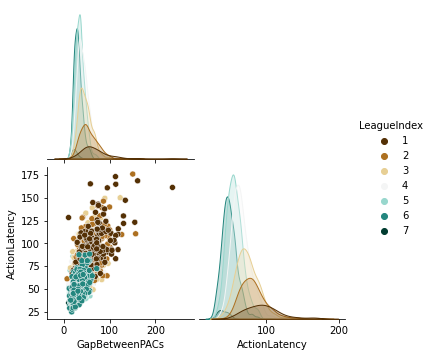

In [23]:
plt.figure(figsize=(20,15))
feature_negative_correlated = ['GapBetweenPACs','ActionLatency']
sns.pairplot(sc_clean,hue = 'LeagueIndex', vars=feature_negative_correlated,palette="BrBG",corner=True)

> Dans un second temps, on visualise le pairplot **des données corrélées négativement** avec **LeagueIndex**, c'est à dire le niveau du joueur. 
> On remarque une certaine disparitée entre les très bons joueurs en vert, les joueurs moyens en clair et les joueurs moins bons en beige. Cependant, il reste difficle à différencier un joueur bon ou moyen et un très bon joueur.
> On peut expliquer la corrélation de certaines données :
> - **ActionLatency** : Un bon joueur aura un temps de latence bien plus faible entre ses actions, moins d'hésitation et la capacité d'anticipé ses futures actions à faire par rapport à un joueur débutant qui aura plus de mal.
> - **GapBetweenPACs** : Dans la même, logique que les actions Latency, un bon joueur aura plus de facilité à se déplacer efficacement dans la carte pour effectuer ses actions.

### Visualisation on Age

C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

<Figure size 1440x720 with 0 Axes>

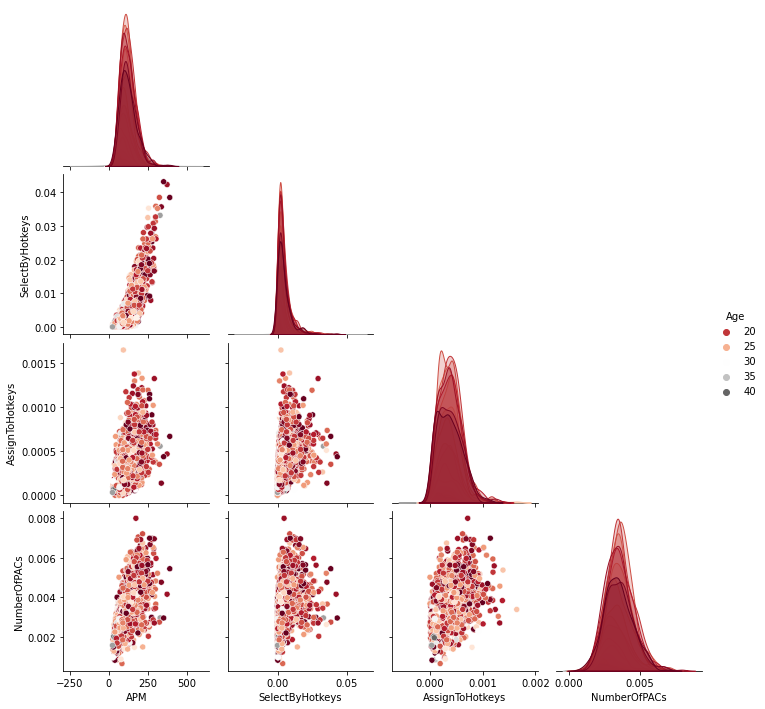

In [24]:
plt.figure(figsize=(20,10))
feature_positive_correlated = ['APM','SelectByHotkeys','AssignToHotkeys','NumberOfPACs']
sns.pairplot(sc_clean,hue = 'Age',vars =feature_positive_correlated,palette="RdGy",corner=True)

> Dans un deuxième temps, nous avons visualiser les features par rapport à l'âge du joueur. D'après la matrice de corrélation, il existe des faibles corrélations négatives de l'âge sur le nombre d'action APM et le nombre de Cycle Perspection Action (NumberOfPACs). Un âge plus élevé entraîne des actions moins rapides ?
> Nous voulions vérifier cela avec ces visuels :
> - On remarque seulement qu'un écart d'âge élevé de plus de 30 ans a un **impact significatif sur la performance et la rapidité**.
> - Les jeunes de moins de 30 ans possèdent **des performances très similaires** cependant.

C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lin37\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

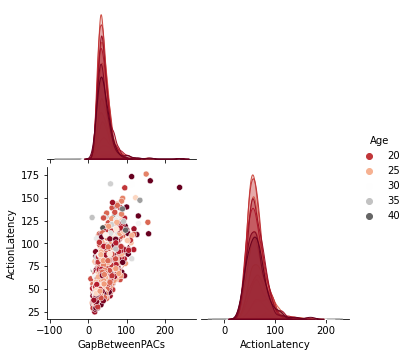

In [25]:
plt.figure(figsize=(20,10))
feature_negative_correlated = ['GapBetweenPACs','ActionLatency']
sns.pairplot(sc_clean,hue = 'Age', vars=feature_negative_correlated,palette="RdGy",corner=True)

> On remarque cependant que le temps entre **les actions et les cycles Perspection-Action sont peu corrélés**. L'âge **ne semble pas affecté l'organisation et la stratégie** du joueur entre 2 actions pendant une partie mais seulement la **rapidité d'executer les actions sur ses unités.**
>
> Un **âge élevé diminue la rapidité** pour réaliser les actions mais n'affecte **faiblement la stratégie globale** du joueur au cours d'une partie.

## Machine Learning

### Import libraries ML

In [26]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Data Preprocessing

> On retire les colonnes GameID et league, GameID n'étant pas pertinant pour le model et league qui avait été rajouté pour les plot.
> Split des données en train et test

In [27]:
sc_ml = sc_clean.drop(["GameID","league"], axis=1)
X, y = sc_ml.drop('LeagueIndex', axis=1), sc_ml['LeagueIndex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

> Scaling des données

In [28]:
scl = sk.preprocessing.StandardScaler()

X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

> Nous créons une méthode qui nous permettra d'entrainer le model et afficher l'accuracy, le MSE, le r² ainsi qu'une matrice de confusion.

In [29]:
labels = ["Logistic Regression", "Linear Discriminant Analysis", "Gaussian Naive Bayes", "Random Forest", 
             "Decision Tree", "KNN", "SVC"]
accuracy = []
mse = []
r2 = []

def model_predict(model, X_train, X_test, y_train, y_test):                    
    model.fit(X_train, y_train)                  
    y_pred = model.predict(X_test)   
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    mse_model = mean_squared_error(y_test, y_pred)
    mse.append(mse_model)
    r2_model = r2_score(y_test, y_pred)
    r2.append(r2_model)
    print("accuracy : " + str(acc) + " mse : " + str(mse_model) + " r² : " + str(r2_model))
    
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    plt.figure(figsize=(6, 6)) 
    sns.heatmap(conf_matrix, annot=True, square=True, cmap="BrBG");

### Logistic Regression

accuracy : 0.4121756487025948 mse : 1.120758483033932 r² : 0.4869873730742298


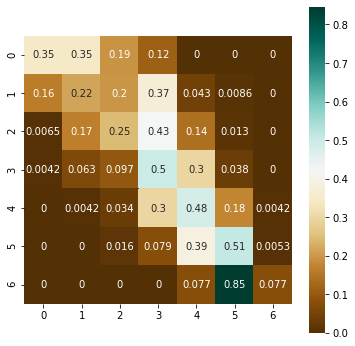

In [30]:
model_lr = LogisticRegression(max_iter=10000, random_state = 23)
model_predict(model_lr, X_train_scaled, X_test_scaled, y_train, y_test)

### Linear Discriminant Analysis

accuracy : 0.3972055888223553 mse : 1.2165668662674651 r² : 0.443132331057423


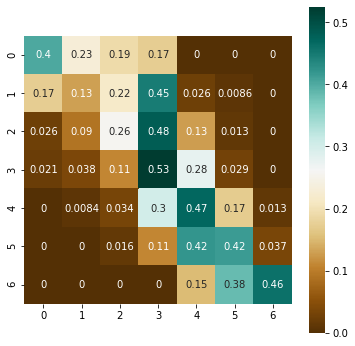

In [31]:
model_lda = LinearDiscriminantAnalysis()
model_predict(model_lda, X_train_scaled, X_test_scaled, y_train, y_test)

### GaussianNB

accuracy : 0.344311377245509 mse : 1.5768463073852295 r² : 0.27821910014005613


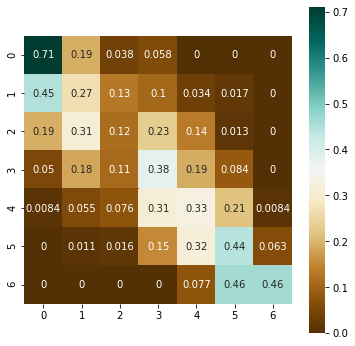

In [32]:
model_nb = GaussianNB()
model_predict(model_nb, X_train_scaled, X_test_scaled, y_train, y_test)

### Random Forest Classifier

accuracy : 0.39221556886227543 mse : 1.1167664670658684 r² : 0.48881466649159666


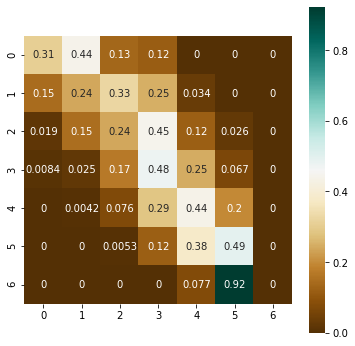

In [33]:
model_rf = RandomForestClassifier(n_estimators=100)
model_predict(model_rf, X_train, X_test, y_train, y_test)

### Decision Tree Classifier

accuracy : 0.32435129740518964 mse : 1.8233532934131738 r² : 0.1653837316176472


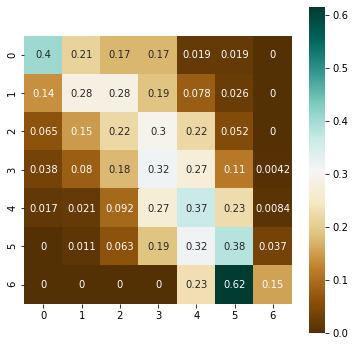

In [34]:
model_dt = DecisionTreeClassifier()
model_predict(model_dt, X_train, X_test, y_train, y_test)

### KNN

accuracy : 0.35429141716566864 mse : 1.284431137724551 r² : 0.412068342962185


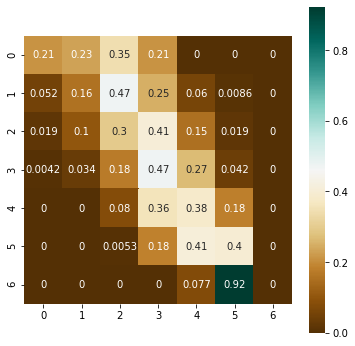

In [35]:
model_kn = KNeighborsClassifier(n_neighbors=30)
model_predict(model_kn, X_train_scaled, X_test_scaled, y_train, y_test)

### SVC

accuracy : 0.3912175648702595 mse : 1.156686626746507 r² : 0.4705417323179273


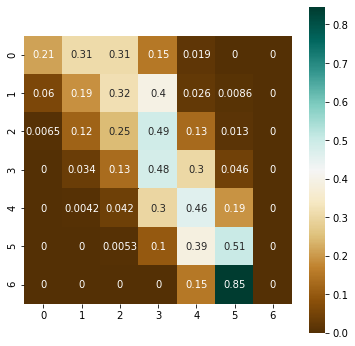

In [36]:
model_svc = SVC(gamma="auto") 
model_predict(model_svc, X_train_scaled, X_test_scaled, y_train, y_test)

> Affichage des données obtenues pour chaque algorithme.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Linear Discriminant Analysis'),
  Text(2, 0, 'Gaussian Naive Bayes'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'KNN'),
  Text(6, 0, 'SVC')])

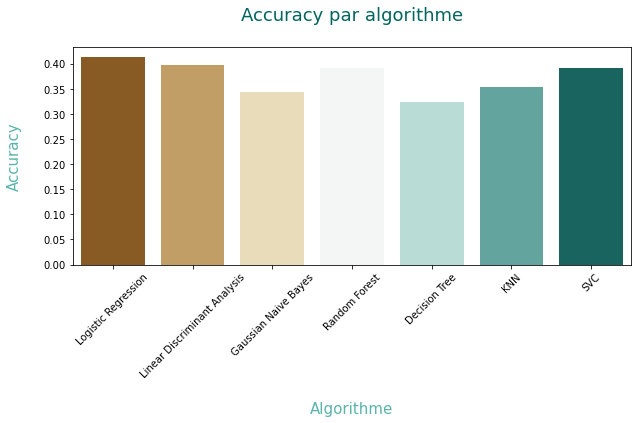

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x=labels, y=accuracy, palette="BrBG")
plt.xlabel('\nAlgorithme', fontsize=15, color='#5ab4ac')
plt.ylabel("Accuracy\n", fontsize=15, color='#5ab4ac')
plt.title("Accuracy par algorithme\n", fontsize=18, color='#01665e')
plt.xticks(rotation= 45)

> Selon l'accuracy, les algorithmes les plus intéressants sont Logistic Regression, Linear Discriminant Analysis, Random Forest et SVC.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Linear Discriminant Analysis'),
  Text(2, 0, 'Gaussian Naive Bayes'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'KNN'),
  Text(6, 0, 'SVC')])

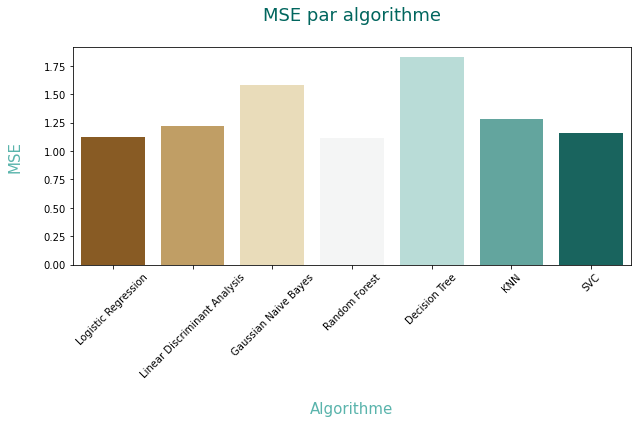

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x=labels, y=mse, palette="BrBG")
plt.xlabel('\nAlgorithme', fontsize=15, color='#5ab4ac')
plt.ylabel("MSE\n", fontsize=15, color='#5ab4ac')
plt.title("MSE par algorithme\n", fontsize=18, color='#01665e')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Linear Discriminant Analysis'),
  Text(2, 0, 'Gaussian Naive Bayes'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'KNN'),
  Text(6, 0, 'SVC')])

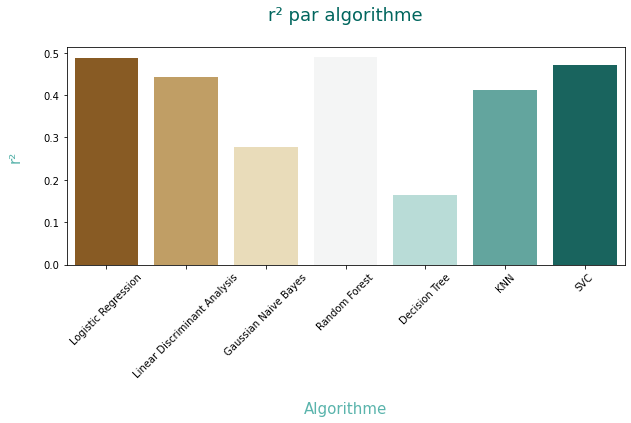

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(x=labels, y=r2, palette="BrBG")
plt.xlabel('\nAlgorithme', fontsize=15, color='#5ab4ac')
plt.ylabel("r²\n", fontsize=15, color='#5ab4ac')
plt.title("r² par algorithme\n", fontsize=18, color='#01665e')
plt.xticks(rotation= 45)

> Après observations des MSE et r², nous retiendrons les algorithmes Logistic Regression, Random Forest et SVC car ce sont les plus performants dans notre cas.

### GridSearch et Cross-Validation

> Avec le GridSearchCV, nous déterminons les paramètres qui nous permettent d'obtenir la meilleure précision possible.

In [40]:
param_grid = {"C": range(100)}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, verbose = 1, cv = 5, n_jobs = -1)

model_lr_grid = lr_grid.fit(X_train_scaled, y_train)

print (model_lr_grid.best_score_)
print (model_lr_grid.best_params_)
print (model_lr_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.4s finished


0.4130950420029649
{'C': 5}
LogisticRegression(C=5, max_iter=1000)


> Avec ces paramètres, la précision du model obtenue par Logistic Regression s'améliore de 0.1%

In [41]:
param_grid = { 
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)

model_rf_grid = rf_grid.fit(X_train, y_train)

print (model_rf_grid.best_score_)
print (model_rf_grid.best_params_)
print (model_rf_grid.best_estimator_)

0.4024021303464559
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)


> Avec ces paramètres, la précision du model obtenue par Random Forest Classifier s'améliore de 2%

In [42]:
param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc_grid = GridSearchCV(SVC(),param_grid)

model_svc_grid = svc_grid.fit(X_train_scaled, y_train)

print (model_svc_grid.best_score_)
print (model_svc_grid.best_params_)
print (model_svc_grid.best_estimator_)

0.4109527992825638
{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


> Avec ces paramètres, la précision du model obtenue par SVC s'améliore de 2%.

### Conclusion

> Au final, nous retenons le model de Logistic Regression qui est le plus intéressant dans notre cas.

## API Flask

> Exportation du model pour l'API

In [43]:
import pickle
pickle.dump(model_lr_grid, open('model.pickle', 'wb'))